In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
def reading_csv(filepath):
    df = pd.read_csv(filepath)
    df.rename({'Unnamed: 0':''}, axis=1, inplace=True)
    df.set_index('', inplace=True)
    return df

In [7]:
distance_df = reading_csv('haversine_distance_matrix.csv')
distance_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000,5.097,7.979,3.876,6.889,5.085,5.259,10.321,9.845,31.916,8.125,1.840,3.991
kansanga,5.097,0.000,12.934,6.831,11.940,2.371,1.156,9.881,9.484,31.679,8.397,3.257,3.089
nansana_east,7.979,12.934,0.000,9.408,1.439,13.021,12.805,13.263,15.943,35.978,11.152,9.745,11.809
lubaga,3.876,6.831,9.408,0.000,8.014,5.314,7.566,14.144,6.649,28.200,11.982,4.543,3.991
nansana_west,6.889,11.940,1.439,8.014,0.000,11.848,11.913,13.298,14.517,34.601,11.093,8.703,10.597


In [8]:
corr_df = reading_csv('pairwise_correlation.csv')
corr_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),1.000,0.822,0.682,0.548,0.260,0.824,0.852,0.630,0.660,0.597,0.656,0.838,0.772
kansanga,0.822,1.000,0.617,0.523,0.119,0.855,0.918,0.639,0.609,0.651,0.729,0.779,0.744
nansana_east,0.682,0.617,1.000,0.472,0.407,0.725,0.684,0.579,0.541,0.499,0.501,0.709,0.707
lubaga,0.548,0.523,0.472,1.000,0.257,0.521,0.509,0.432,0.494,0.462,0.488,0.549,0.492
nansana_west,0.260,0.119,0.407,0.257,1.000,0.266,0.192,0.233,0.275,0.088,0.042,0.337,0.408


In [9]:
cod_df = reading_csv('coefficient_of_divergence.csv')
cod_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000,0.193,0.314,0.264,0.393,0.183,0.180,0.260,0.215,0.265,0.248,0.186,0.209
kansanga,0.193,0.000,0.382,0.325,0.448,0.177,0.143,0.317,0.274,0.234,0.272,0.252,0.249
nansana_east,0.314,0.382,0.000,0.231,0.306,0.317,0.354,0.214,0.253,0.401,0.296,0.245,0.247
lubaga,0.264,0.325,0.231,0.000,0.320,0.289,0.316,0.216,0.206,0.342,0.244,0.213,0.235
nansana_west,0.393,0.448,0.306,0.320,0.000,0.412,0.436,0.335,0.342,0.458,0.410,0.331,0.347


In [63]:
def plot_results(location):
    '''
    Plots distance, correlation and COD for a location against other locations
    '''
    x_values = cod_df.index.values
    y1_values = cod_df[location].values
    y2_values = distance_df[location].values
    y3_values = corr_df[location].values
    
    x_axis_label = 'Locations'
    y1_axis_label = 'Distance (km)'
    y2_axis_label = 'Correlation/COD'
    y1_label =  'Coefficient of Divergence'
    y2_label =  'Haversine Distance'
    y3_label =  'Pearson Correlation'
    

    fig, ax1 = plt.subplots(figsize=(12,10))
    ax1.set_xlabel(x_axis_label)
    ax1.set_ylabel(y1_axis_label)
    ax1.plot(x_values, y2_values, color='black', marker='o', linestyle='solid', label=y2_label, linewidth=2.0, markersize=12)
    ax1.legend()

    ax2 = ax1.twinx()
    ax2.set_ylabel(y2_axis_label)
    ax2.plot(x_values, y1_values, color='blue', marker='*', linestyle='solid', label=y1_label, linewidth=1.0, markersize=12)
    ax2.plot(x_values, y3_values, color='green', marker='*', linestyle='solid', label=y3_label, linewidth=1.0, markersize=12)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
  
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    plt.title(location)
    fig.tight_layout() 
    plt.show()
    fig.savefig('plots/'+location+'.png')  

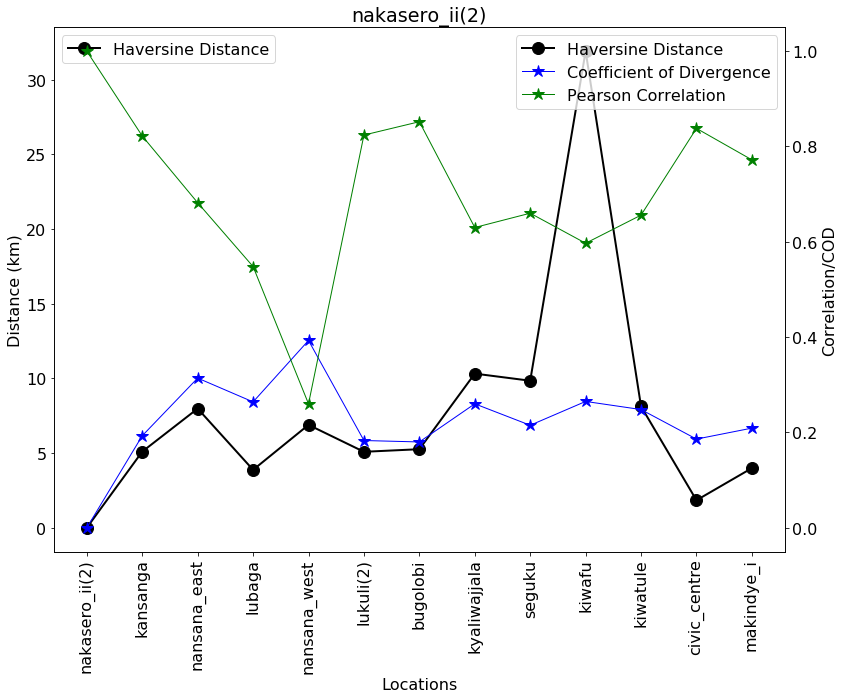

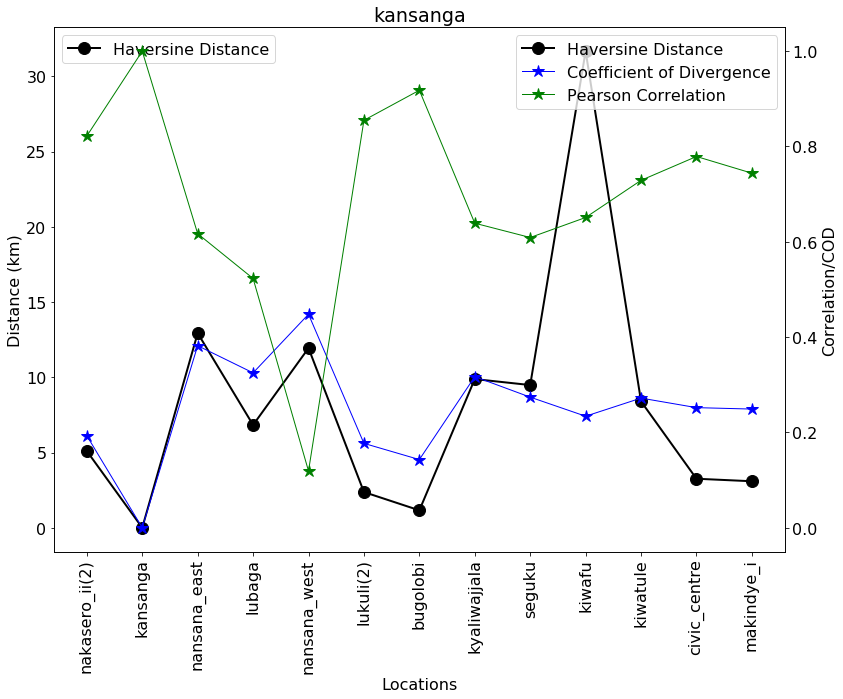

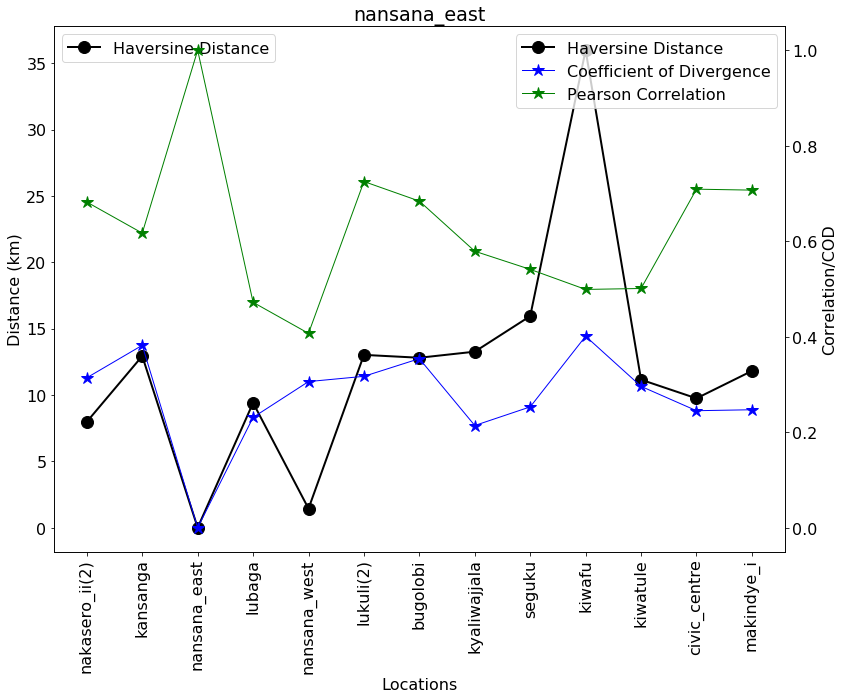

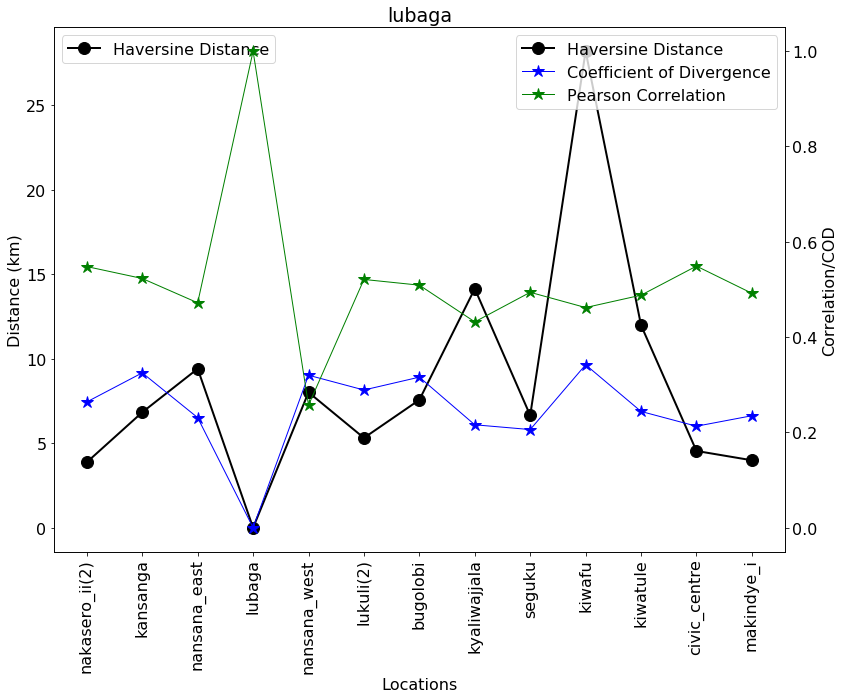

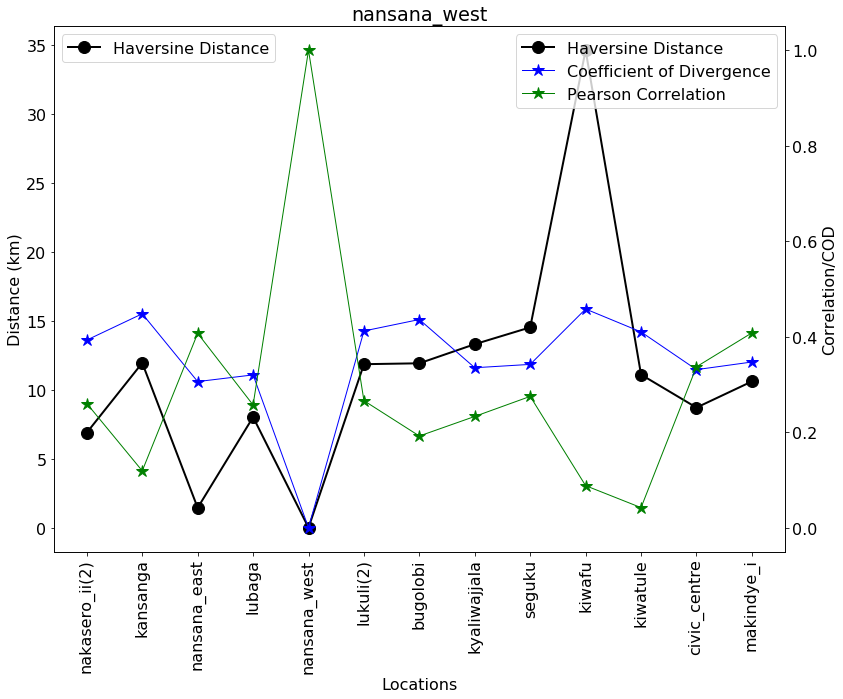

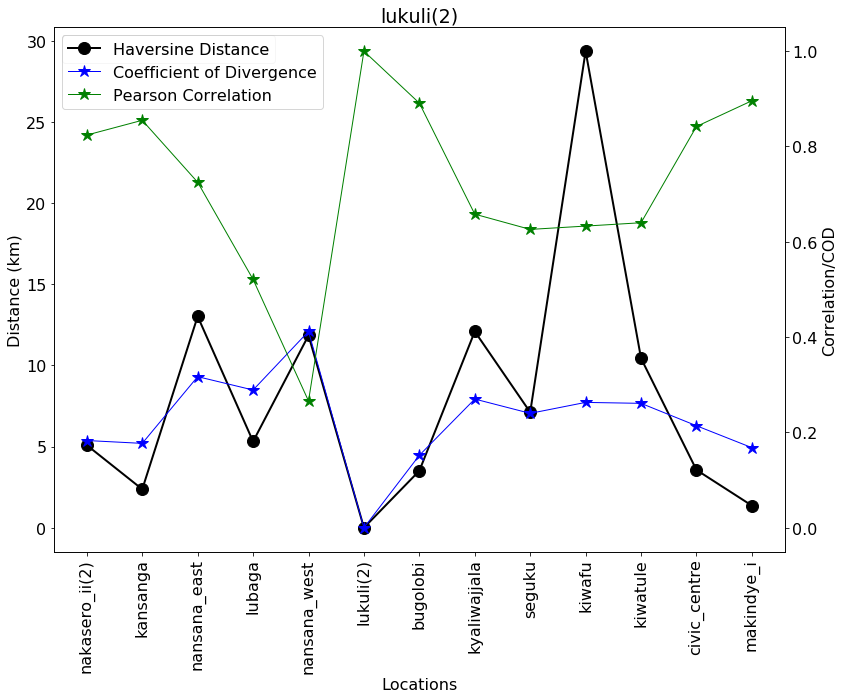

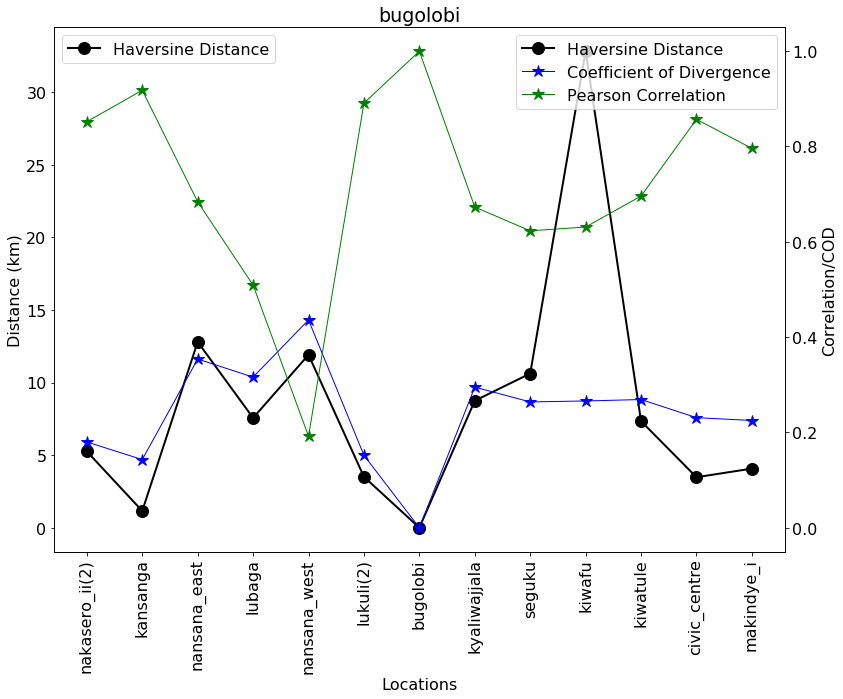

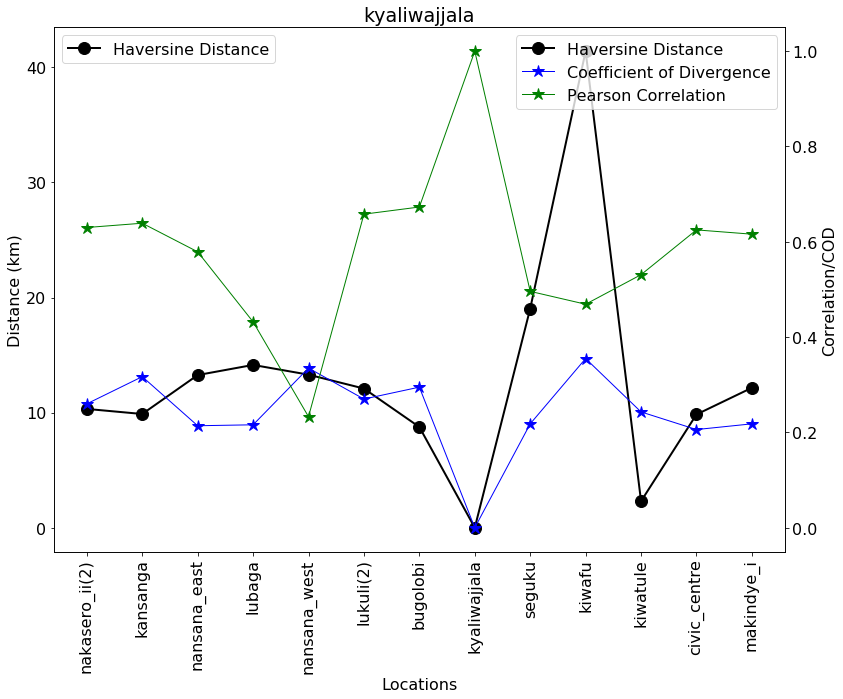

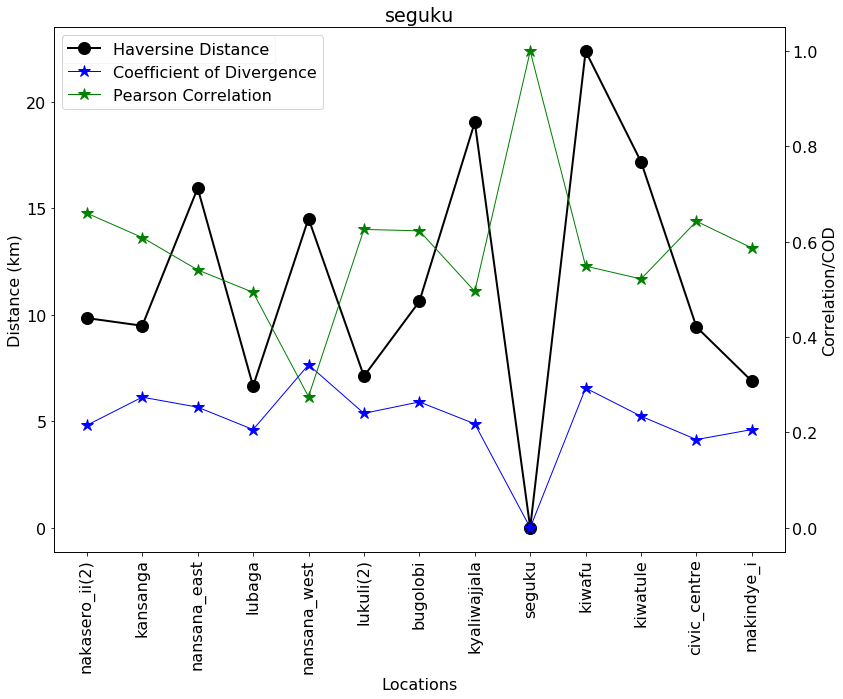

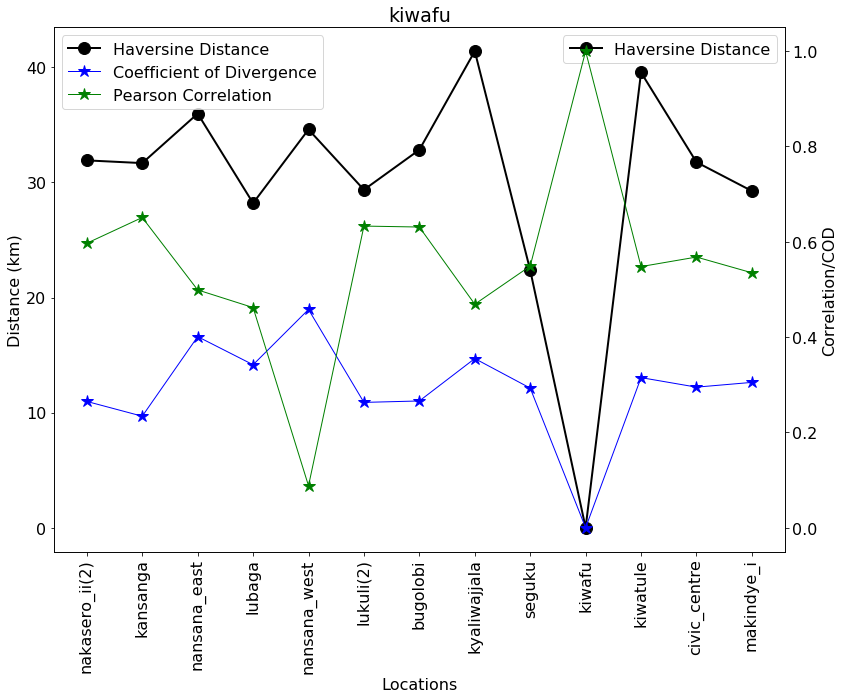

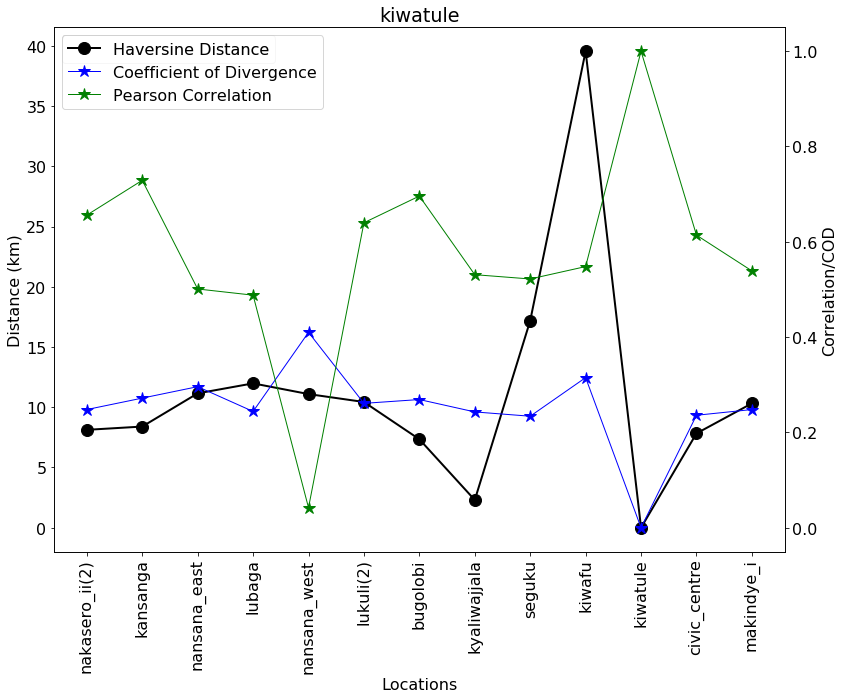

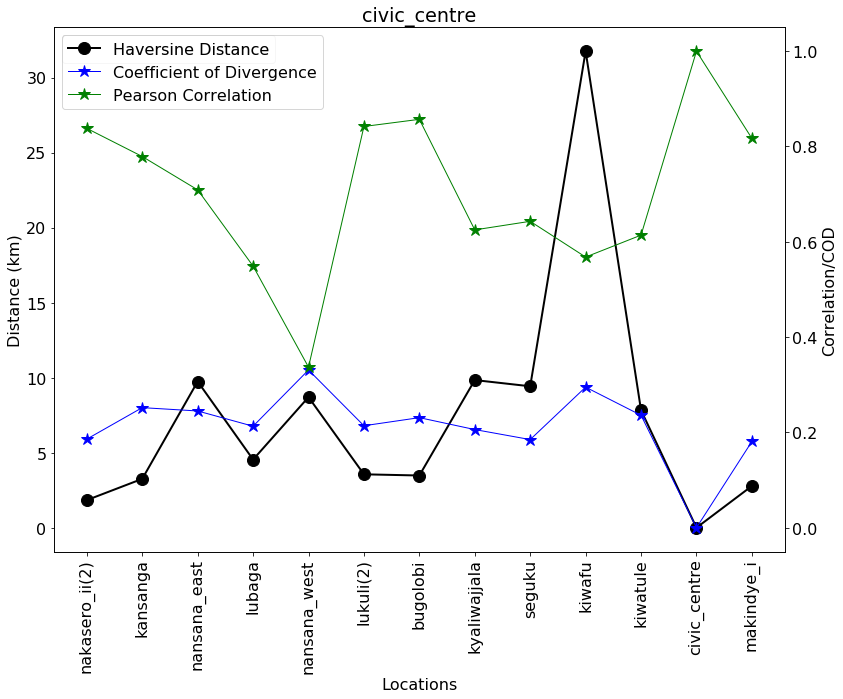

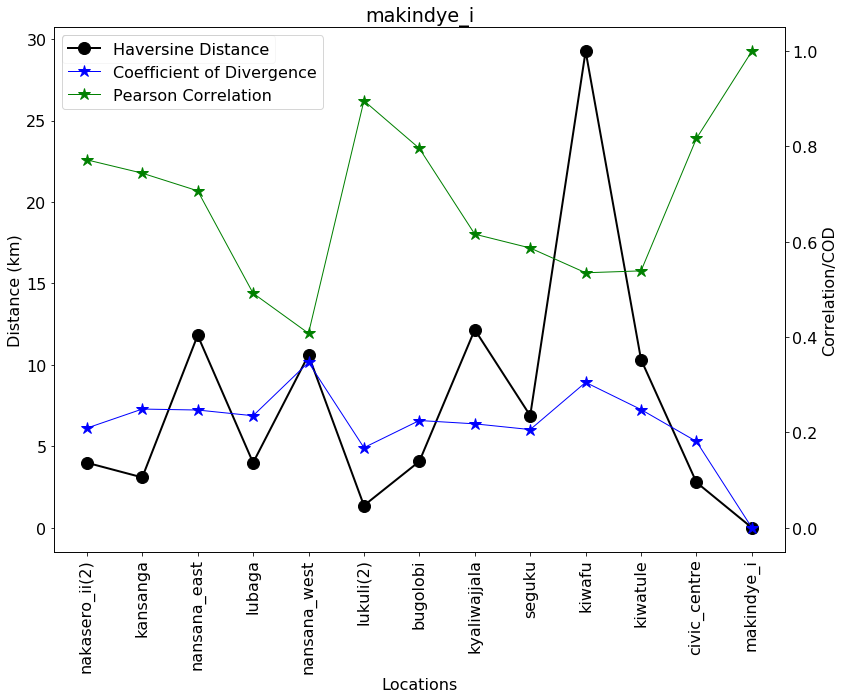

In [64]:
for i, location in enumerate(cod_df.index.values):
    plot_results(location)

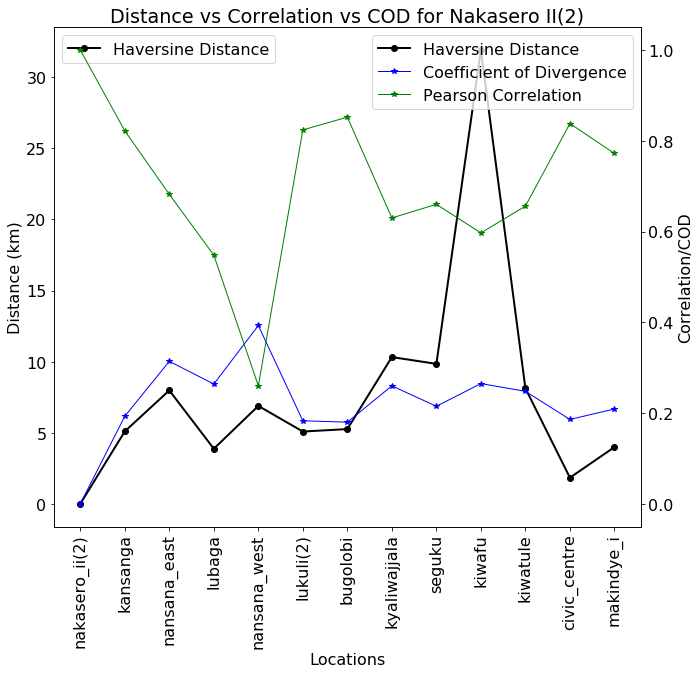

In [61]:
#Plotting distance vs correlation
x_values = cod_df.index.values
y1_values = cod_df['nakasero_ii(2)'].values
y2_values = distance_df['nakasero_ii(2)'].values
y3_values = corr_df['nakasero_ii(2)'].values

        
x_axis_label = 'Locations'
y1_axis_label = 'Distance (km)'
y2_axis_label = 'Correlation/COD'
y1_label =  'Coefficient of Divergence'
y2_label =  'Haversine Distance'
y3_label =  'Pearson Correlation'

    
chart_title  =  'Distance vs Correlation vs COD for Nakasero II(2)'

fig, ax1 = plt.subplots(figsize=(10,8))
ax1.set_xlabel(x_axis_label)
ax1.set_ylabel(y1_axis_label)
ax1.plot(x_values, y2_values, color='black', marker='o', linestyle='solid', label=y2_label, linewidth=2.0)
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel(y2_axis_label)
ax2.plot(x_values, y1_values, color='blue', marker='*', linestyle='solid', label=y1_label, linewidth=1.0)
ax2.plot(x_values, y3_values, color='green', marker='*', linestyle='solid', label=y3_label, linewidth=1.0)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
plt.title(chart_title)
fig.tight_layout()  
plt.show()
fig.savefig('plots/testing.png')
    